## AMLDS Final Project Experiments

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import sklearn
import importlib



In [68]:
# importlib.reload(models)
# importlib.reload(utils)
# importlib.reload(utils.graph_utils)
# importlib.reload(visualization.plot_utils)
# importlib.reload(main)

import models
import utils
import utils.graph_utils
import visualization.plot_utils
import main

from models import DeGrootThresholdModel
from utils import add_random_edges, assign_edge_weights
from utils.graph_utils import create_sbm_graph, create_random_geometric_graph
from visualization.plot_utils import plot_network, plot_posting_heatmap
from main import run_experiment


## Example experiment

### Build a graph

Random geometric

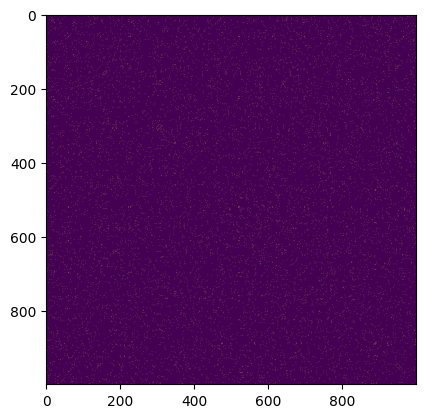

In [69]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.06 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

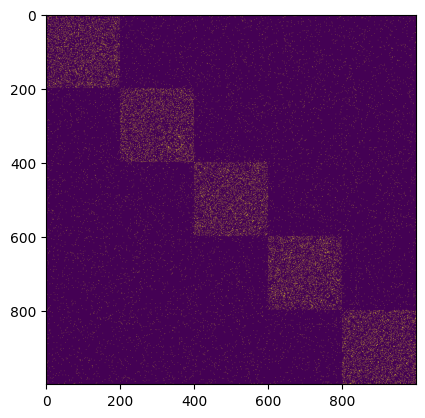

In [70]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.01                     # probability between communities
)
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

In [71]:

for node in G.nodes():
    community = G.nodes[node].get('block', None)  # SBM stores community as 'block' attribute
    print(f"Node {node}: Community {community}")


Node 0: Community 0
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 4: Community 0
Node 5: Community 0
Node 6: Community 0
Node 7: Community 0
Node 8: Community 0
Node 9: Community 0
Node 10: Community 0
Node 11: Community 0
Node 12: Community 0
Node 13: Community 0
Node 14: Community 0
Node 15: Community 0
Node 16: Community 0
Node 17: Community 0
Node 18: Community 0
Node 19: Community 0
Node 20: Community 0
Node 21: Community 0
Node 22: Community 0
Node 23: Community 0
Node 24: Community 0
Node 25: Community 0
Node 26: Community 0
Node 27: Community 0
Node 28: Community 0
Node 29: Community 0
Node 30: Community 0
Node 31: Community 0
Node 32: Community 0
Node 33: Community 0
Node 34: Community 0
Node 35: Community 0
Node 36: Community 0
Node 37: Community 0
Node 38: Community 0
Node 39: Community 0
Node 40: Community 0
Node 41: Community 0
Node 42: Community 0
Node 43: Community 0
Node 44: Community 0
Node 45: Community 0
Node 46: Community 0
Node 47: Community 0
No

In [72]:
ispal_prop = [.1, .2, .29, .22, .19] 



In [73]:
import numpy as np

def cyclic_variations(base_vector, delta=0.05, n_variations=None, tol=1e-8):
    """
    Generate structured variations of a probability vector by applying cyclic ±delta shifts.

    Parameters
    ----------
    base_vector : array-like
        A probability vector that sums to 1.
    delta : float
        Amount to perturb each row by (adds to one index, subtracts from another).
    n_variations : int, optional
        Number of variations to return. If None, defaults to len(base_vector).
        If greater than len(base_vector), wraps around cyclically.
    tol : float
        Tolerance for sum check and non-negativity.

    Returns
    -------
    variations : np.ndarray
        Array of shape (n_variations, len(base_vector)) of perturbed probability vectors.
    """
    base = np.array(base_vector, dtype=float)
    d = len(base)

    if not np.allclose(base.sum(), 1.0, atol=tol):
        raise ValueError("Base vector must sum to 1.")

    if n_variations is None:
        n_variations = d

    variations = np.zeros((n_variations, d))

    for i in range(n_variations):
        v = base.copy()
        a = i % d
        b = (i + 1) % d
        v[a] += delta
        v[b] -= delta

        if np.any(v < -tol):  # allow slight negative due to round-off, but not beyond tol
            raise ValueError(f"Delta={delta} is too large at variation {i} (produced negative entry).")

        # Ensure it's clipped to [0, 1] and renormalized if necessary
        v = np.clip(v, 0, 1)
        v /= v.sum()  # rescale to sum to 1
        variations[i] = v

    return variations

In [74]:
abortion_prop = [0.31, 0.34, 0.27, 0.08] # 95/5
V = cyclic_variations(abortion_prop, np.min(abortion_prop))
print("Variations:\n", V)
print("Each row sums to 1:", np.allclose(V.sum(axis=1), 1))
print("Column-wise mean:", V.mean(axis=0))
print("Matches base:", np.allclose(V.mean(axis=0), abortion_prop))

ispal_prop = [0.1, 0.2, 0.29, 0.22, 0.19]
V = cyclic_variations(ispal_prop, delta=np.min(ispal_prop))

print("Variations:\n", V)
print("Each row sums to 1:", np.allclose(V.sum(axis=1), 1))
print("Column-wise mean:", V.mean(axis=0))
print("Matches base:", np.allclose(V.mean(axis=0), ispal_prop))

Variations:
 [[0.39 0.26 0.27 0.08]
 [0.31 0.42 0.19 0.08]
 [0.31 0.34 0.35 0.  ]
 [0.23 0.34 0.27 0.16]]
Each row sums to 1: True
Column-wise mean: [0.31 0.34 0.27 0.08]
Matches base: True
Variations:
 [[0.2  0.1  0.29 0.22 0.19]
 [0.1  0.3  0.19 0.22 0.19]
 [0.1  0.2  0.39 0.12 0.19]
 [0.1  0.2  0.29 0.32 0.09]
 [0.   0.2  0.29 0.22 0.29]]
Each row sums to 1: True
Column-wise mean: [0.1  0.2  0.29 0.22 0.19]
Matches base: True


In [75]:
SBM_bias_blocks = V 
print(ispal_prop)
print(SBM_bias_blocks)

[0.1, 0.2, 0.29, 0.22, 0.19]
[[0.2  0.1  0.29 0.22 0.19]
 [0.1  0.3  0.19 0.22 0.19]
 [0.1  0.2  0.39 0.12 0.19]
 [0.1  0.2  0.29 0.32 0.09]
 [0.   0.2  0.29 0.22 0.29]]


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


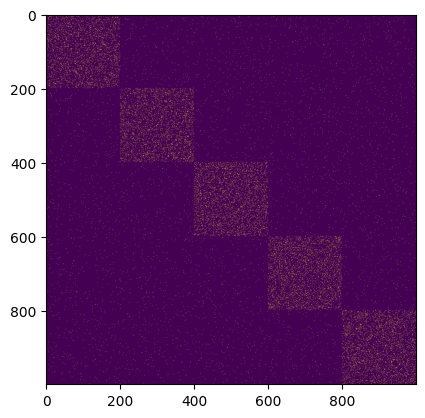

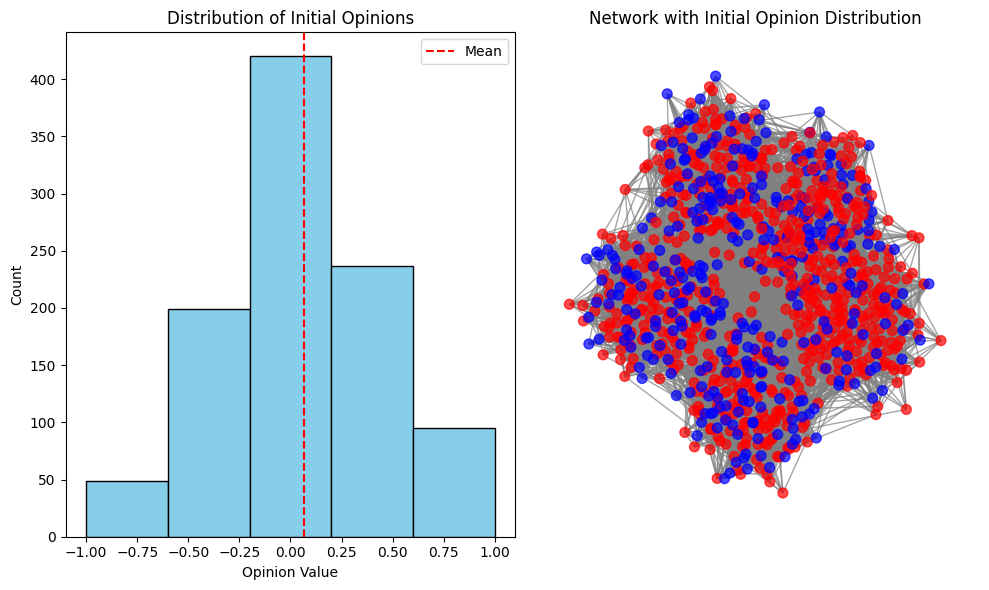

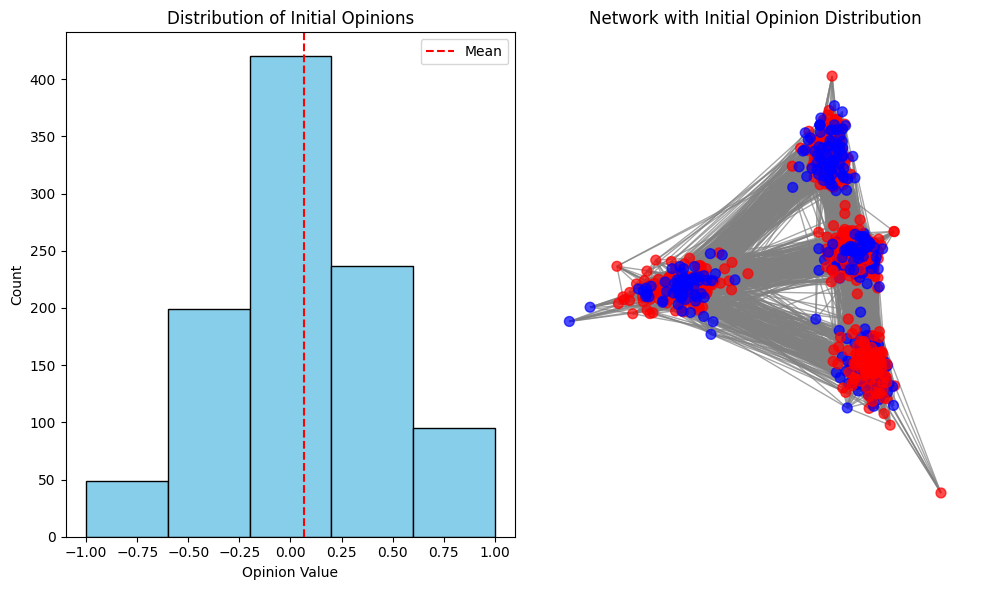

Is the graph connected? True
Are there self loops? False


In [76]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.08,                    # probability within communities
    p_inter=0.005                     # probability between communities
)

plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations
model = DeGrootThresholdModel(G, local_agreement_threshold=0.6)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10
ispal_bias_prop = cyclic_variations(ispal_prop, delta=np.min(ispal_prop))

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop, 
    SBM_bias_blocks=ispal_bias_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


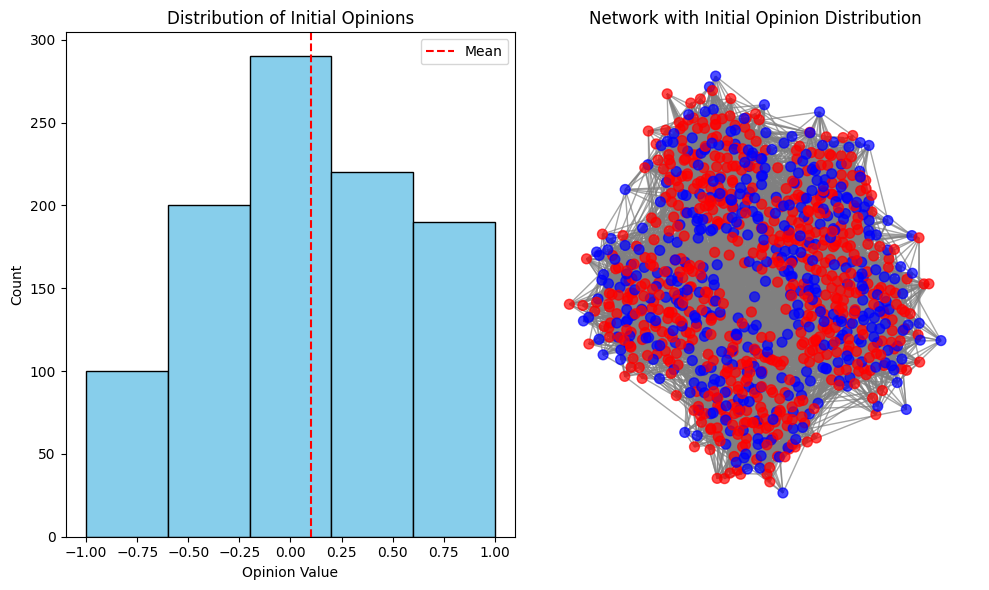

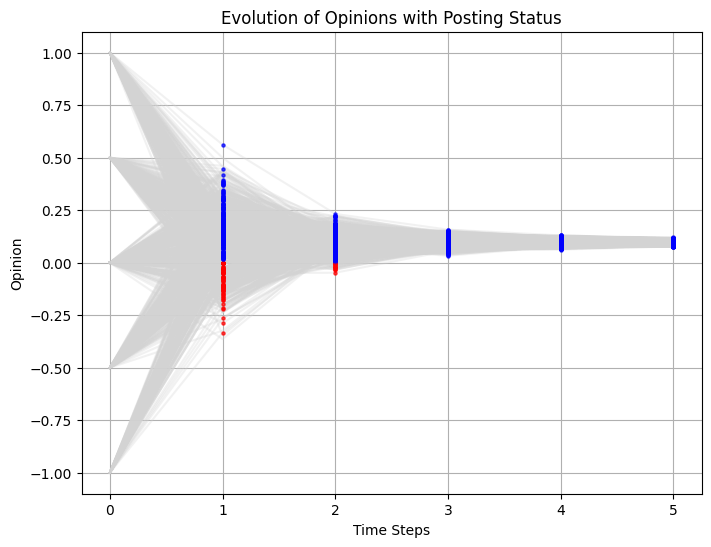

/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: invalid value encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts
/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:211: RuntimeWarning: invalid value encountered in scalar divide
  proportion_positive = positive_posts / (positive_posts + negative_posts)
/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: divide by zero encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts


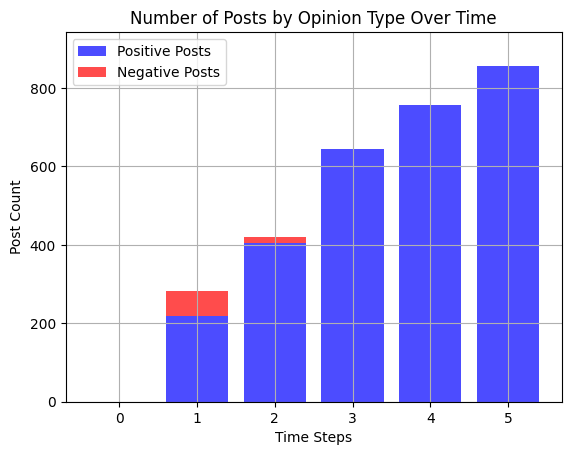

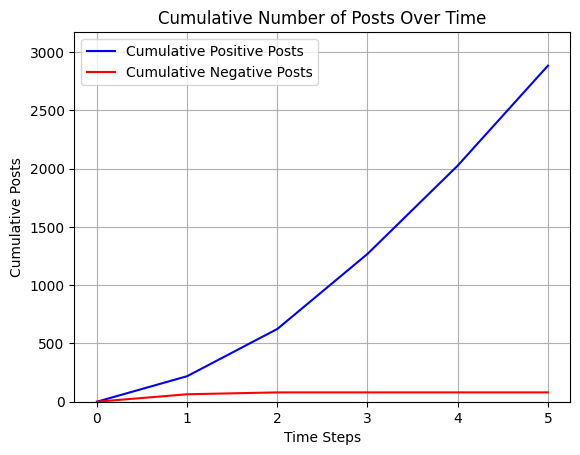

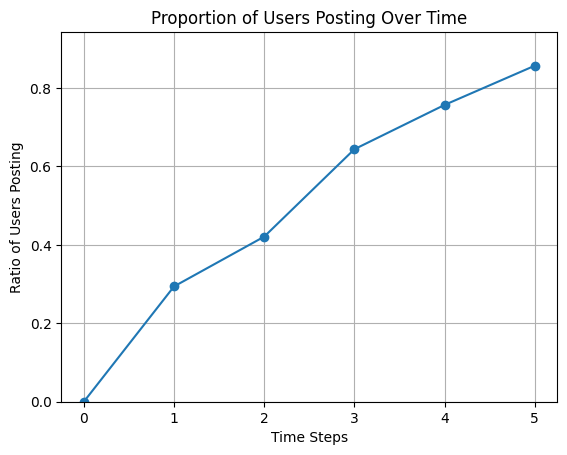

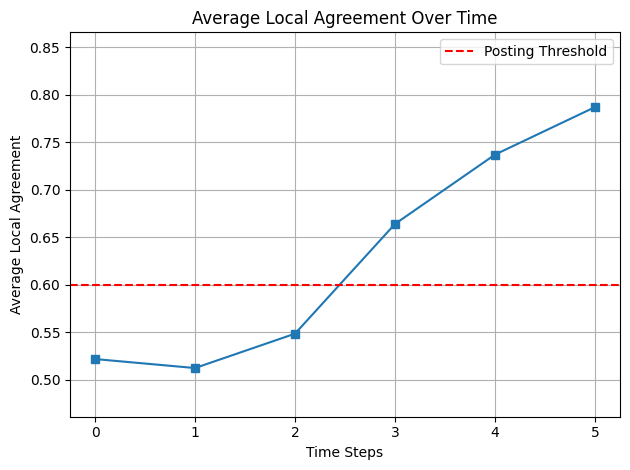

EXPERIMENT STATS:
Total posts: 3272
Positive posts: 2904 (0.89)
Negative posts: 234 (0.07)
Overall pos/neg ratio: 12.41
Overall proportion of positive posts: 0.93
Variance in proportion of positive posts over time: 0.0097

Final opinion range: 0.0466
Final opinion variance: 0.0001
Final opinion std dev: 0.0106
Final average local agreement: 0.7868
Final local agreement variance: 0.0358
Second largest eigenvalue: 0.7881


In [77]:
model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5,
    visualize=True
)

### Run DeGroot Model simulation on a given graph

Random geometric

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


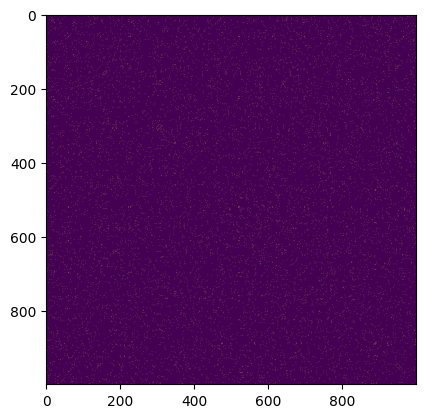

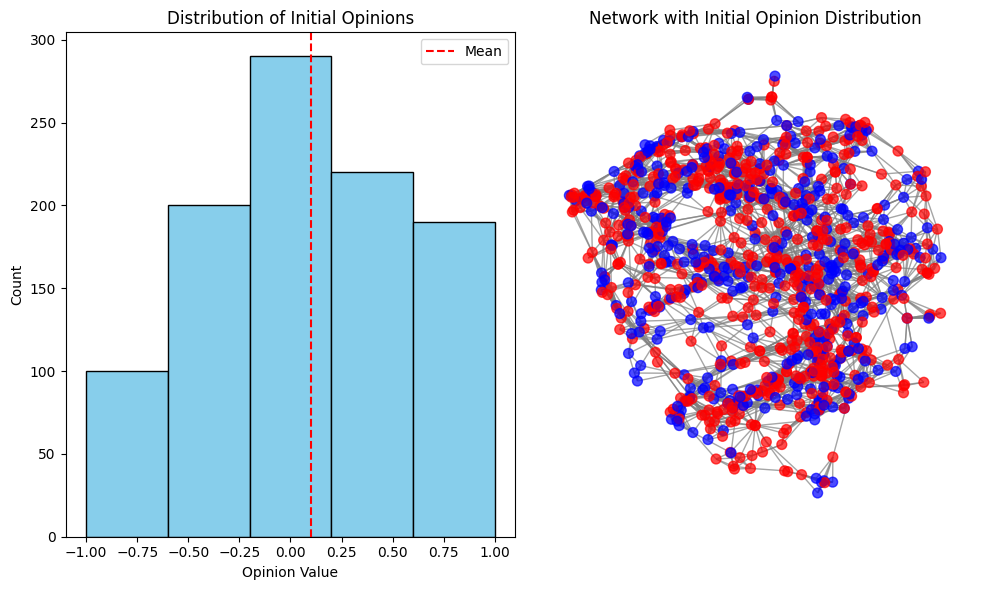

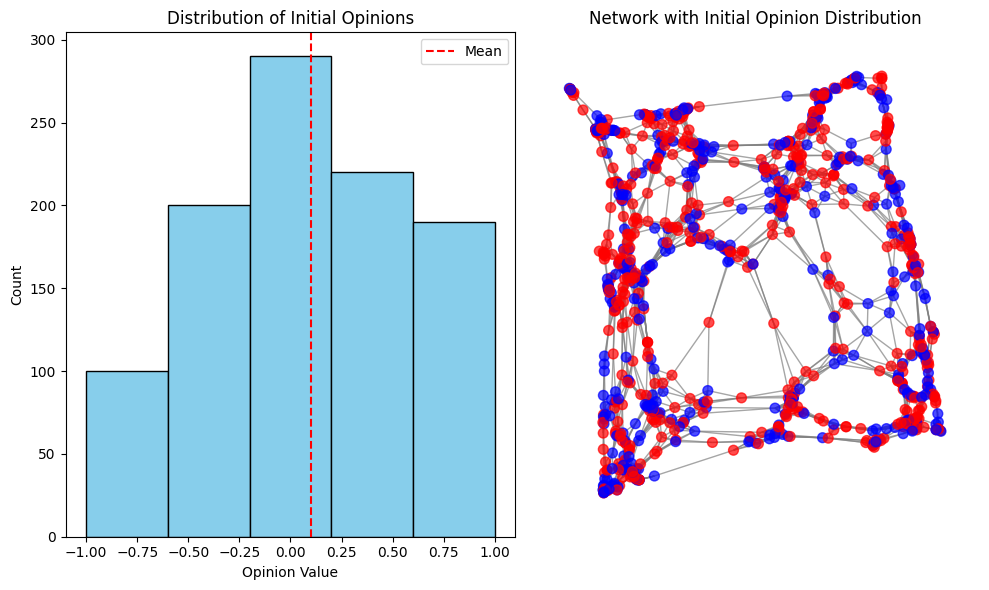

Is the graph connected? True
Are there self loops? False


In [54]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.06 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations

model = DeGrootThresholdModel(G, local_agreement_threshold=0.6)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


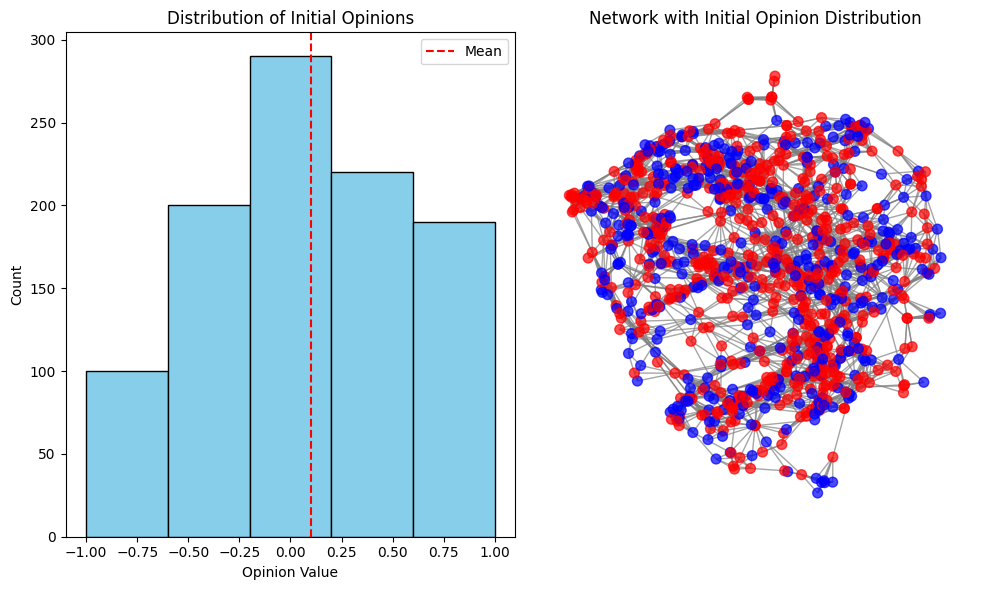

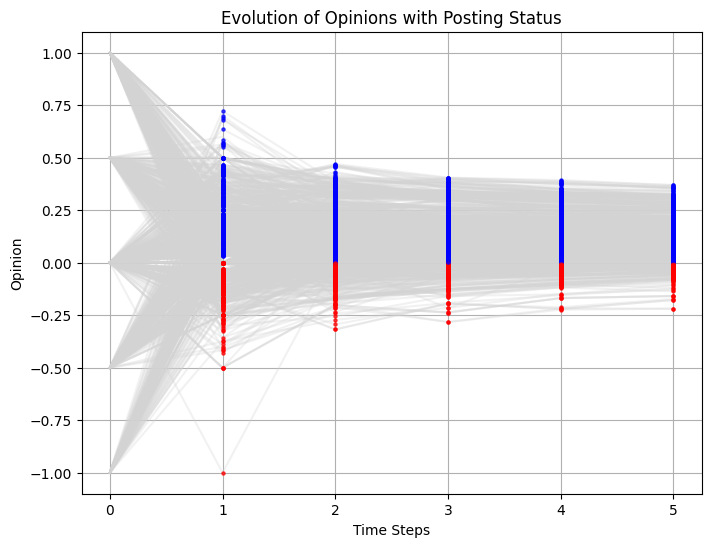

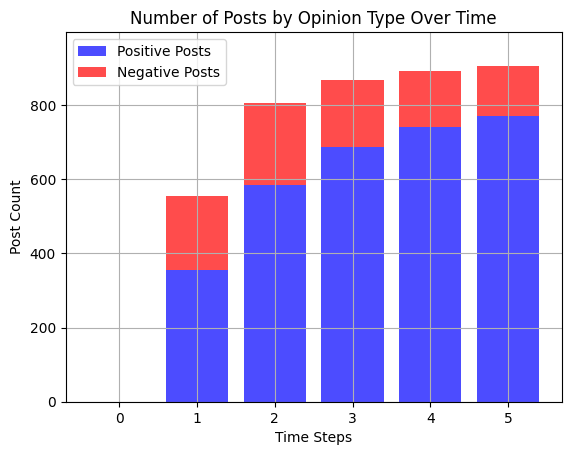

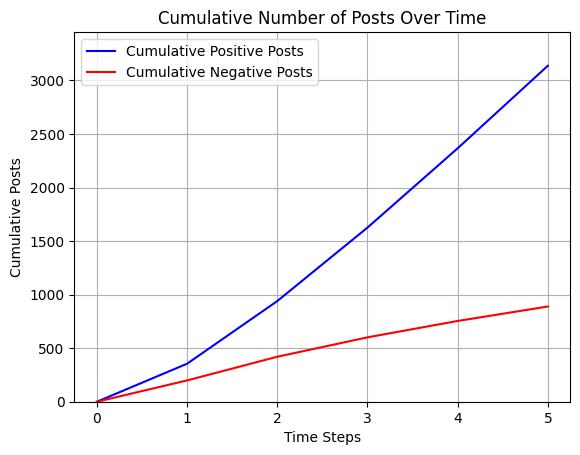

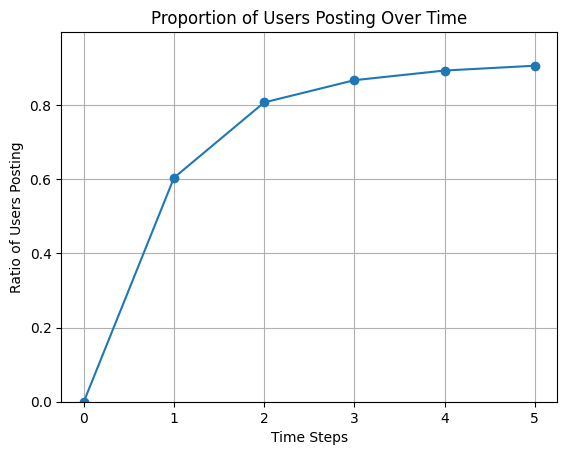

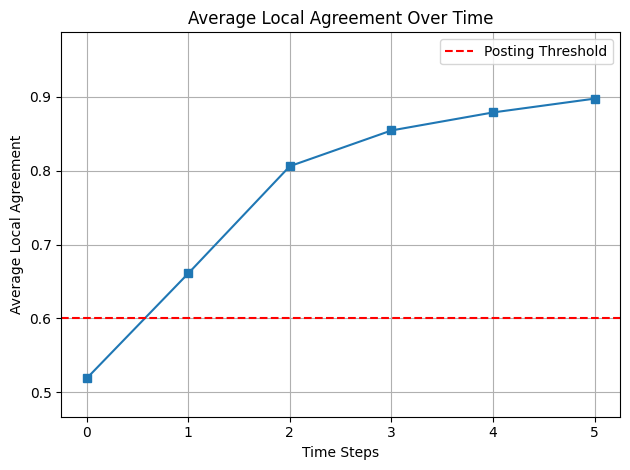

EXPERIMENT STATS:
Total posts: 4388
Positive posts: 3190 (0.73)
Negative posts: 1016 (0.23)
Overall pos/neg ratio: 3.14
Overall proportion of positive posts: 0.76
Variance in proportion of positive posts over time: 0.0073

Final opinion range: 0.5891
Final opinion variance: 0.0101
Final opinion std dev: 0.1004
Final average local agreement: 0.8975
Final local agreement variance: 0.0285


In [55]:
model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5,
    visualize=True
)

[0.057 0.058 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068
 0.069 0.07  0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08
 0.081 0.082 0.083 0.084 0.085 0.086 0.087 0.088 0.089]
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 47273
Positive posts: 44833 (0.95)
Negative posts: 2237 (0.05)
Overall pos/neg ratio: 20.04
Overall proportion of positive posts: 0.95
Variance in proportion of positive posts over time: 0.0060

Final opinion range: 0.1960
Final opinion variance: 0.0010
Final opinion std dev: 0.0315
Final average local agreement: 0.9580
Final local agreement variance: 0.0143
Second largest eigenvalue: 0.9978
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportio

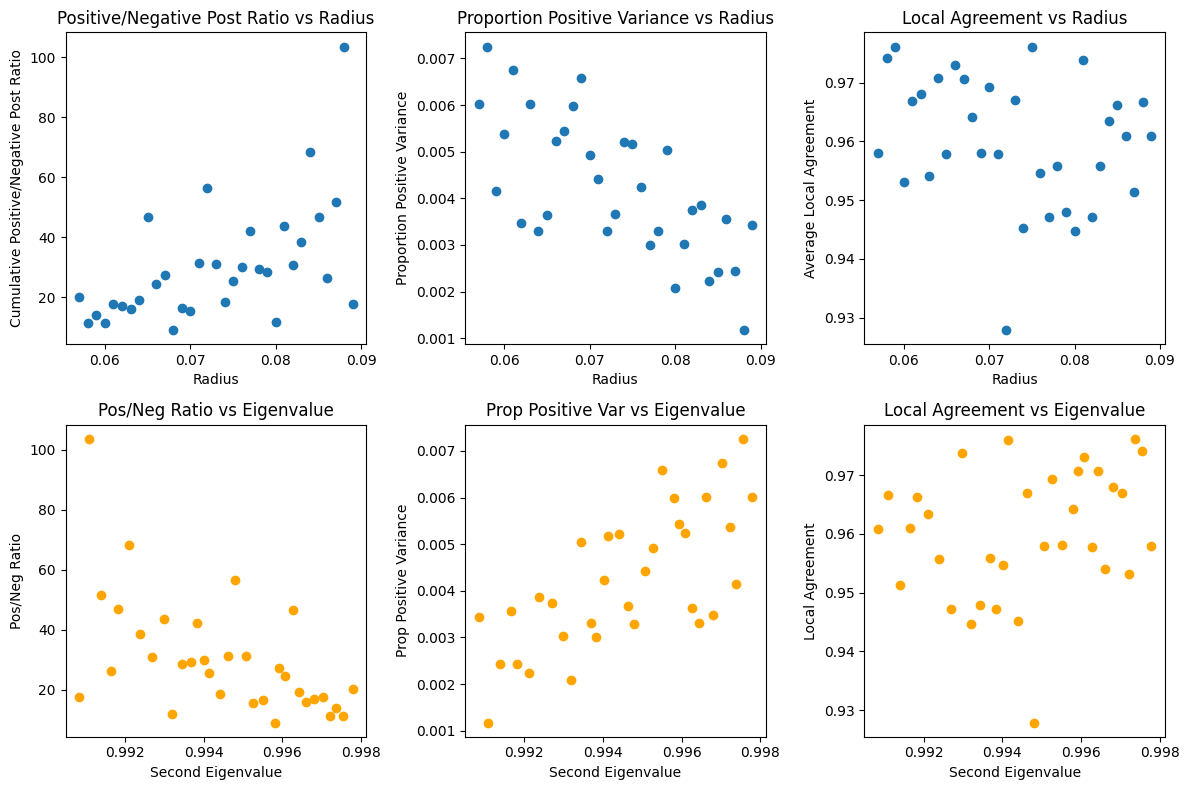

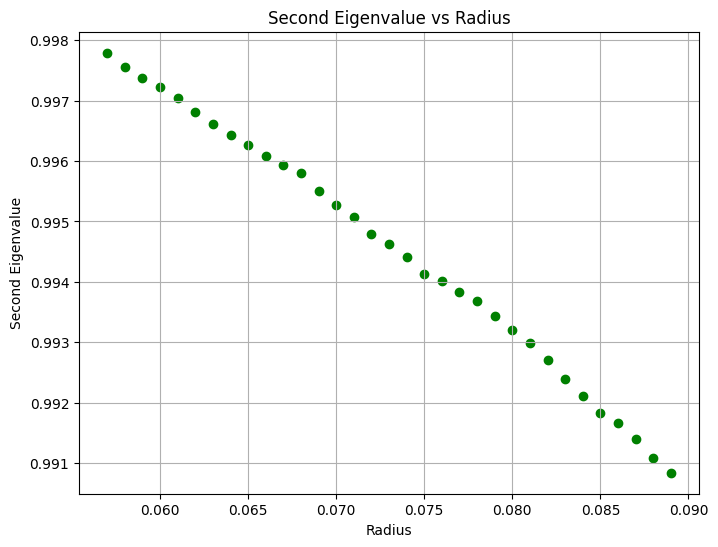

In [ ]:
# Create list of radii from 0.1 to 0.06 with steps of 0.01 - the critical radius is around 0.057
radii = np.arange(0.057, 0.09, 0.001)
print(radii) 
# Run experiments for different radii
results = []
for radius in radii:
    G = create_random_geometric_graph(
        n=1000,  # number of nodes 
        radius=radius
    )
    
    # Run experiment with visualization off to avoid clutter
    model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'radius': radius,
        'cumulative_pos_to_neg_ratio': cumulative_pos_to_neg_ratio,
        'proportion_positive_var': proportion_positive_var,
        'local_agreement': average_local_agreement,
        'second_eigenvalue': second_eigenvalue
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot cumulative positive to negative ratio vs radius
radii_vals = [r['radius'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(radii_vals, pos_neg_ratios)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Cumulative Positive/Negative Post Ratio')
ax1.set_title('Positive/Negative Post Ratio vs Radius')

# Plot proportion positive variance vs radius
prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(radii_vals, prop_vars)
ax2.set_xlabel('Radius')
ax2.set_ylabel('Proportion Positive Variance')
ax2.set_title('Proportion Positive Variance vs Radius')

# Plot local agreement vs radius
agreements = [r['local_agreement'] for r in results]
ax3.scatter(radii_vals, agreements)
ax3.set_xlabel('Radius')
ax3.set_ylabel('Average Local Agreement')
ax3.set_title('Local Agreement vs Radius')
# Plot metrics vs eigenvalue
eigenvals = [r['second_eigenvalue'] for r in results]
ax4.scatter(eigenvals, pos_neg_ratios, color='orange')
ax4.set_xlabel('Second Eigenvalue')
ax4.set_ylabel('Pos/Neg Ratio')
ax4.set_title('Pos/Neg Ratio vs Eigenvalue')

ax5.scatter(eigenvals, prop_vars, color='orange')
ax5.set_xlabel('Second Eigenvalue')
ax5.set_ylabel('Prop Positive Variance')
ax5.set_title('Prop Positive Var vs Eigenvalue')

ax6.scatter(eigenvals, agreements, color='orange')
ax6.set_xlabel('Second Eigenvalue')
ax6.set_ylabel('Local Agreement')
ax6.set_title('Local Agreement vs Eigenvalue')

plt.tight_layout()
plt.show()

# Plot radius vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(radii_vals, eigenvals, color='green')
plt.xlabel('Radius')
plt.ylabel('Second Eigenvalue') 
plt.title('Second Eigenvalue vs Radius')
plt.grid(True)
plt.show()


5-Block SBM

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


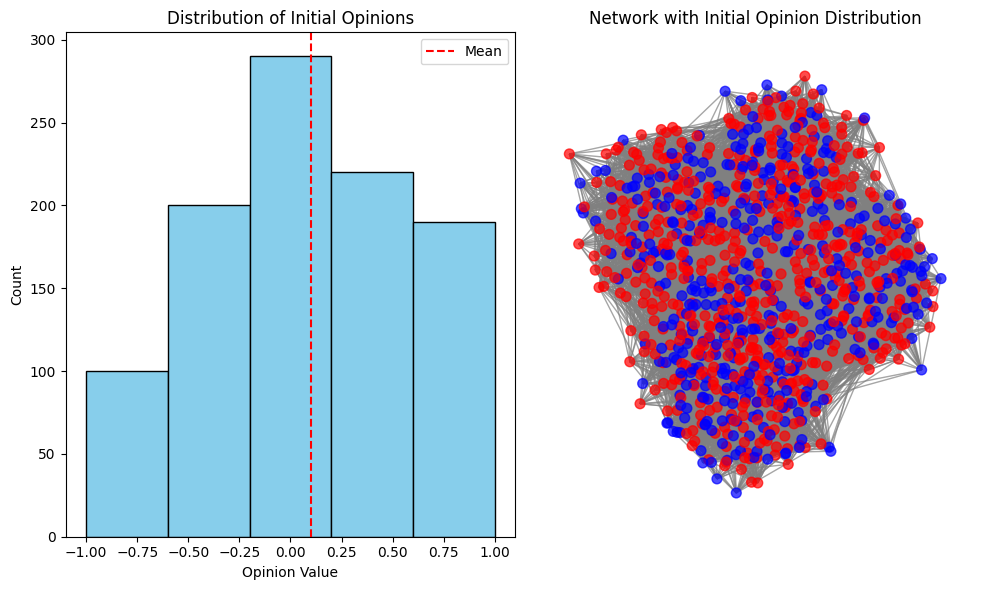

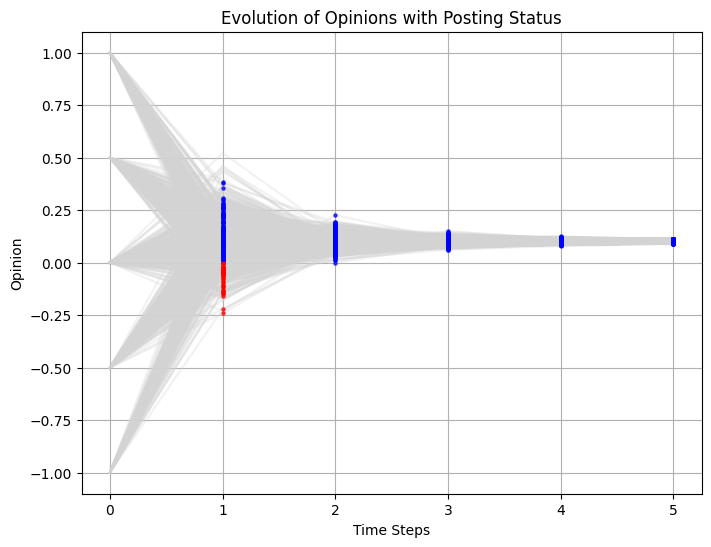

<string>:11: RuntimeWarning: invalid value encountered in scalar divide
<string>:12: RuntimeWarning: invalid value encountered in scalar divide
<string>:11: RuntimeWarning: divide by zero encountered in scalar divide


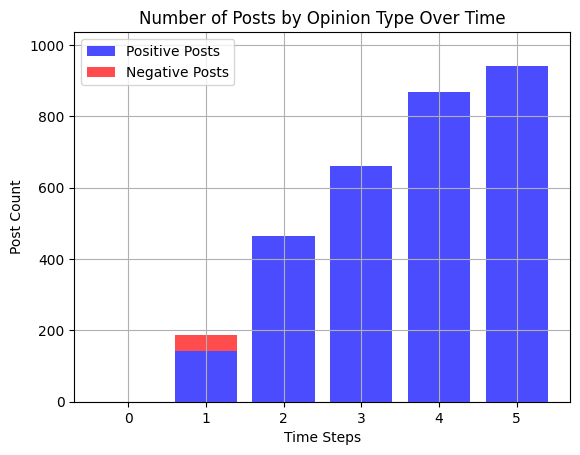

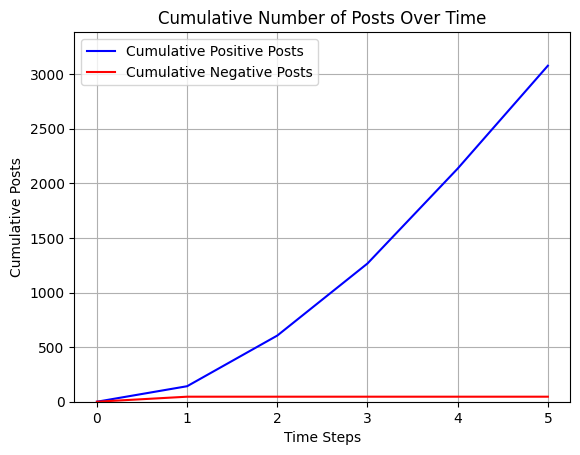

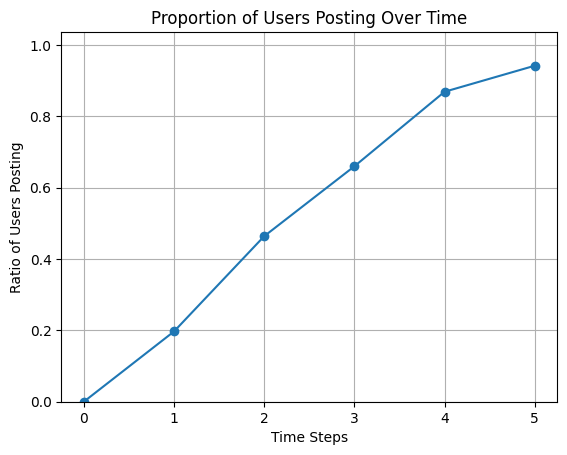

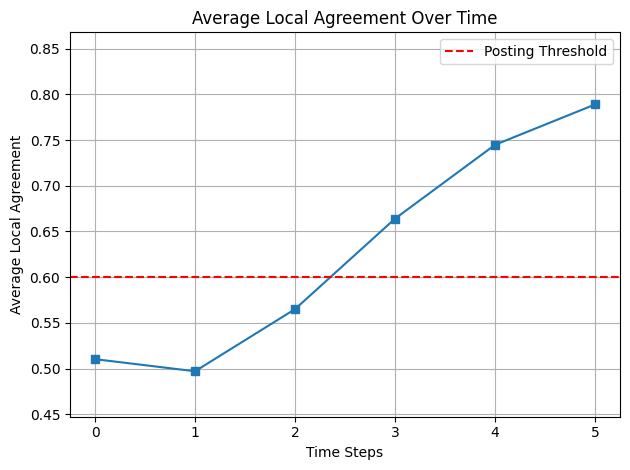

EXPERIMENT STATS:
Total posts: 3388
Positive posts: 3084 (0.91)
Negative posts: 182 (0.05)
Overall pos/neg ratio: 16.95
Overall proportion of positive posts: 0.94
Variance in proportion of positive posts over time: 0.0120

Final opinion range: 0.0269
Final opinion variance: 0.0000
Final opinion std dev: 0.0056
Final average local agreement: 0.7889
Final local agreement variance: 0.0175
Second largest eigenvalue: 0.6837


In [62]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.01                     # probability between communities
)

model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5, 
    visualize=True
)

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 48097
Positive posts: 47761 (0.99)
Negative posts: 189 (0.00)
Overall pos/neg ratio: 252.70
Overall proportion of positive posts: 1.00
Variance in proportion of positive posts over time: 0.0006

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.8283
Final local agreement variance: 0.0075
Second largest eigenvalue: 0.6837
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 47630
Positive posts: 47336 (0.99)
Negative posts: 166 (0.00)
Overall pos/neg ratio: 285.16
Overall proportion of positive posts: 1

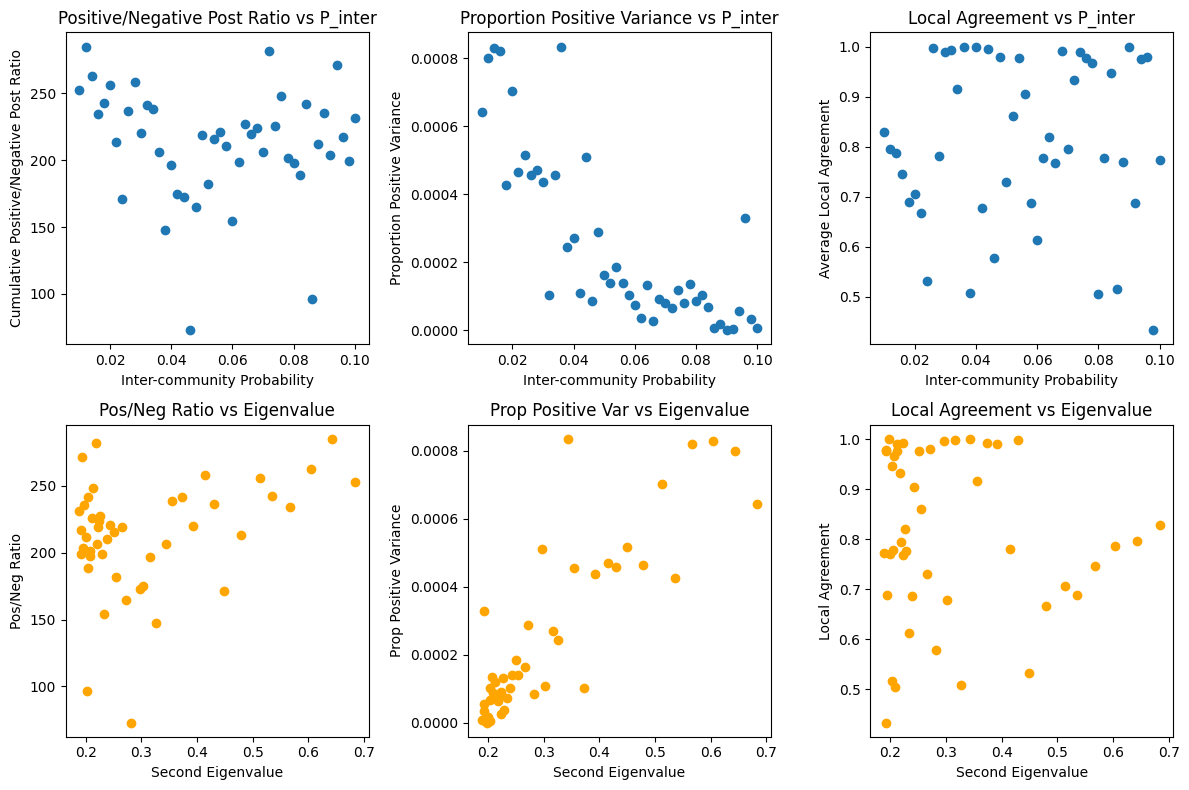

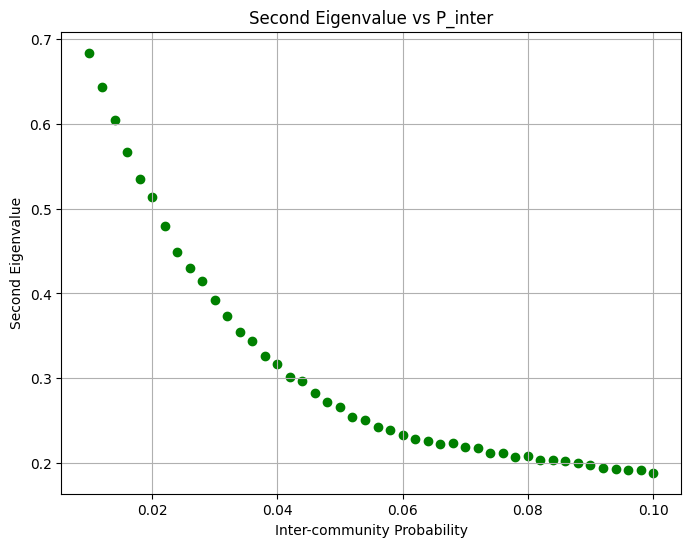

In [80]:
# Create list of inter-community probabilities from 0.01 to 0.05
p_inters = np.arange(0.01, .1, 0.002)

# Run experiments for different inter-community probabilities
results = []
for p_inter in p_inters:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=0.1,                      # fixed intra-community probability
        p_inter=p_inter                    # varying inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'p_inter': p_inter,
        'cumulative_pos_to_neg_ratio': cumulative_pos_to_neg_ratio,
        'proportion_positive_var': proportion_positive_var,
        'local_agreement': average_local_agreement,
        'second_eigenvalue': second_eigenvalue
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot cumulative positive to negative ratio vs p_inter
p_inter_vals = [r['p_inter'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(p_inter_vals, pos_neg_ratios)
ax1.set_xlabel('Inter-community Probability')
ax1.set_ylabel('Cumulative Positive/Negative Post Ratio')
ax1.set_title('Positive/Negative Post Ratio vs P_inter')

# Plot proportion positive variance vs p_inter
prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(p_inter_vals, prop_vars)
ax2.set_xlabel('Inter-community Probability')
ax2.set_ylabel('Proportion Positive Variance')
ax2.set_title('Proportion Positive Variance vs P_inter')

# Plot local agreement vs p_inter
agreements = [r['local_agreement'] for r in results]
ax3.scatter(p_inter_vals, agreements)
ax3.set_xlabel('Inter-community Probability')
ax3.set_ylabel('Average Local Agreement')
ax3.set_title('Local Agreement vs P_inter')

# Plot metrics vs eigenvalue
eigenvals = [r['second_eigenvalue'] for r in results]
ax4.scatter(eigenvals, pos_neg_ratios, color='orange')
ax4.set_xlabel('Second Eigenvalue')
ax4.set_ylabel('Pos/Neg Ratio')
ax4.set_title('Pos/Neg Ratio vs Eigenvalue')

ax5.scatter(eigenvals, prop_vars, color='orange')
ax5.set_xlabel('Second Eigenvalue')
ax5.set_ylabel('Prop Positive Variance')
ax5.set_title('Prop Positive Var vs Eigenvalue')

ax6.scatter(eigenvals, agreements, color='orange')
ax6.set_xlabel('Second Eigenvalue')
ax6.set_ylabel('Local Agreement')
ax6.set_title('Local Agreement vs Eigenvalue')

plt.tight_layout()
plt.show()

# Plot p_inter vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(p_inter_vals, eigenvals, color='green')
plt.xlabel('Inter-community Probability')
plt.ylabel('Second Eigenvalue')
plt.title('Second Eigenvalue vs P_inter')
plt.grid(True)
plt.show()


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 34453
Positive posts: 34082 (0.99)
Negative posts: 223 (0.01)
Overall pos/neg ratio: 152.83
Overall proportion of positive posts: 0.99
Variance in proportion of positive posts over time: 0.0015

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.7020
Final local agreement variance: 0.0191
Second largest eigenvalue: 0.5505
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40605
Positive posts: 40251 (0.99)
Negative posts: 202 (0.00)
Overall pos/neg ratio: 199.26
Overall proportion of positive posts: 1

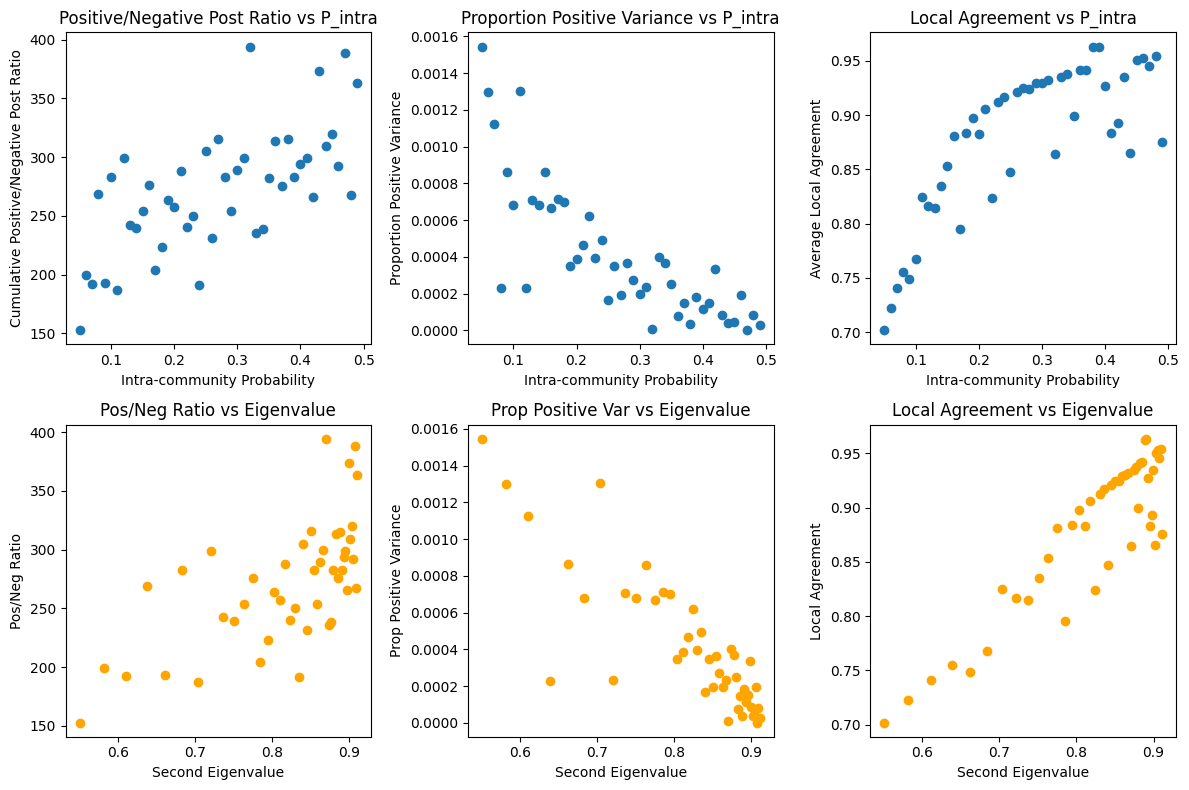

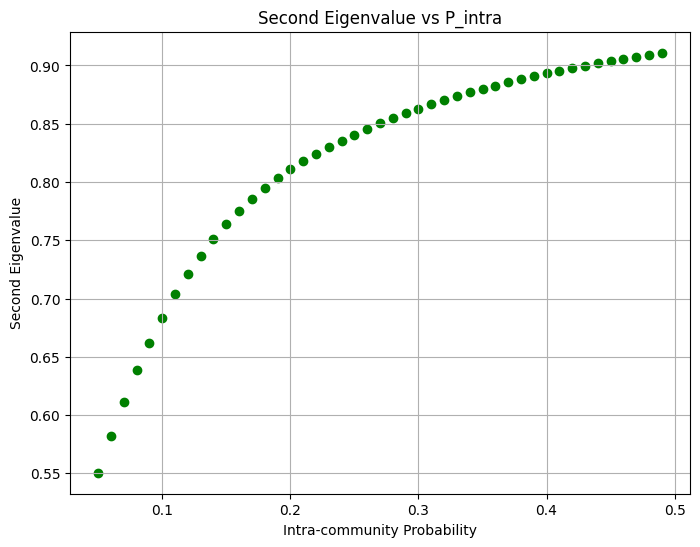

In [81]:
# Create list of intra-community probabilities from 0.1 to 0.5
p_intras = np.arange(0.05, 0.5, 0.01)

# Run experiments for different intra-community probabilities
results = []
for p_intra in p_intras:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=p_intra,                  # varying intra-community probability
        p_inter=0.01                      # fixed inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, pos_to_neg_ratio, prop_pos_var, avg_local_agreement, second_eigenval = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'p_intra': p_intra,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'proportion_positive_var': prop_pos_var,
        'local_agreement': avg_local_agreement,
        'second_eigenvalue': second_eigenval
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot metrics vs p_intra
p_intra_vals = [r['p_intra'] for r in results]
pos_neg_ratios = [r['pos_to_neg_ratio'] for r in results]
prop_vars = [r['proportion_positive_var'] for r in results]
agreements = [r['local_agreement'] for r in results]
eigenvals = [r['second_eigenvalue'] for r in results]

ax1.scatter(p_intra_vals, pos_neg_ratios)
ax1.set_xlabel('Intra-community Probability')
ax1.set_ylabel('Cumulative Positive/Negative Post Ratio')
ax1.set_title('Positive/Negative Post Ratio vs P_intra')

ax2.scatter(p_intra_vals, prop_vars)
ax2.set_xlabel('Intra-community Probability')
ax2.set_ylabel('Proportion Positive Variance')
ax2.set_title('Proportion Positive Variance vs P_intra')

ax3.scatter(p_intra_vals, agreements)
ax3.set_xlabel('Intra-community Probability')
ax3.set_ylabel('Average Local Agreement')
ax3.set_title('Local Agreement vs P_intra')

# Plot metrics vs eigenvalue
ax4.scatter(eigenvals, pos_neg_ratios, color='orange')
ax4.set_xlabel('Second Eigenvalue')
ax4.set_ylabel('Pos/Neg Ratio')
ax4.set_title('Pos/Neg Ratio vs Eigenvalue')

ax5.scatter(eigenvals, prop_vars, color='orange')
ax5.set_xlabel('Second Eigenvalue')
ax5.set_ylabel('Prop Positive Variance')
ax5.set_title('Prop Positive Var vs Eigenvalue')

ax6.scatter(eigenvals, agreements, color='orange')
ax6.set_xlabel('Second Eigenvalue')
ax6.set_ylabel('Local Agreement')
ax6.set_title('Local Agreement vs Eigenvalue')

plt.tight_layout()
plt.show()

# Plot p_intra vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(p_intra_vals, eigenvals, color='green')
plt.xlabel('Intra-community Probability')
plt.ylabel('Second Eigenvalue')
plt.title('Second Eigenvalue vs P_intra')
plt.grid(True)
plt.show()


Build the best SBM based on the above

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


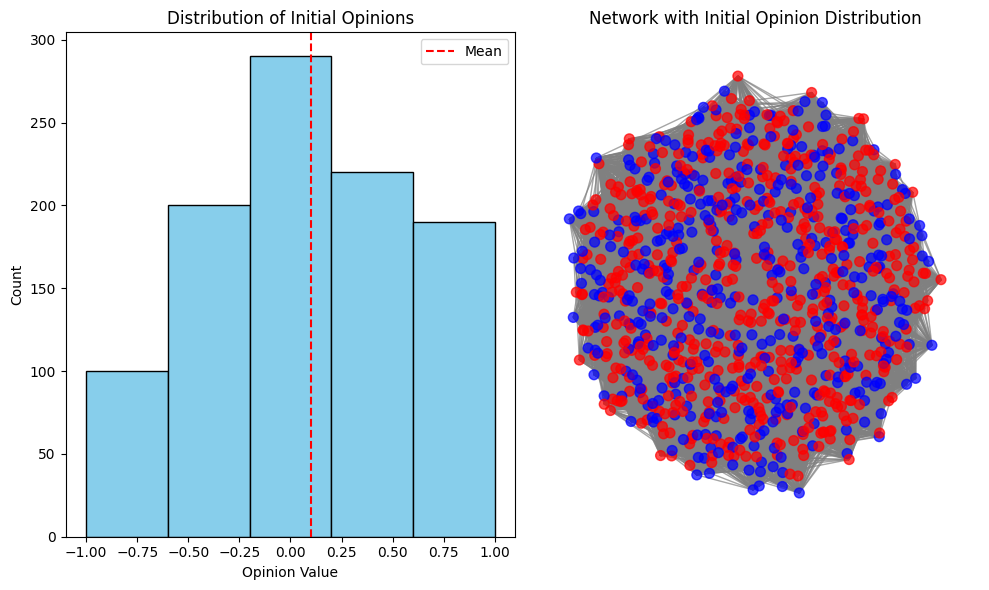

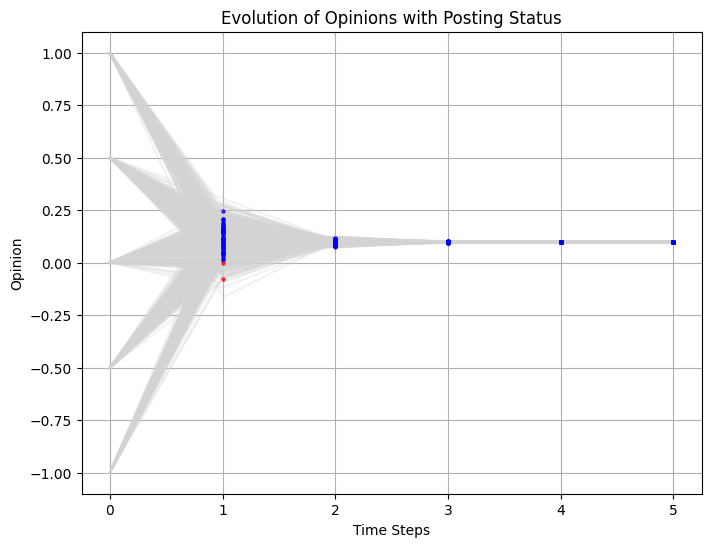

<string>:11: RuntimeWarning: invalid value encountered in scalar divide
<string>:12: RuntimeWarning: invalid value encountered in scalar divide
<string>:11: RuntimeWarning: divide by zero encountered in scalar divide


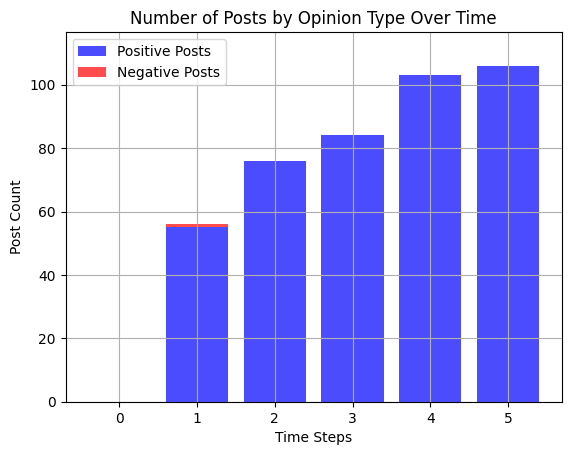

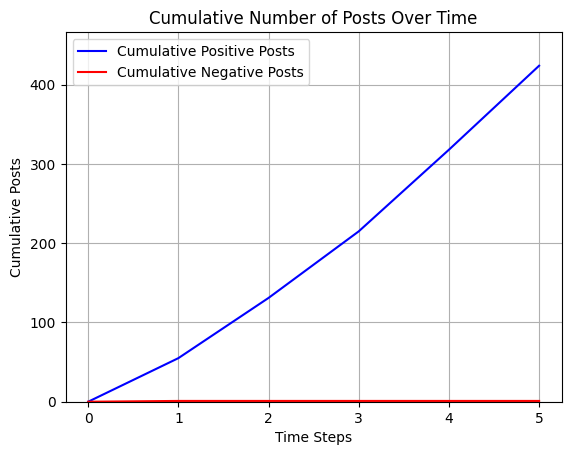

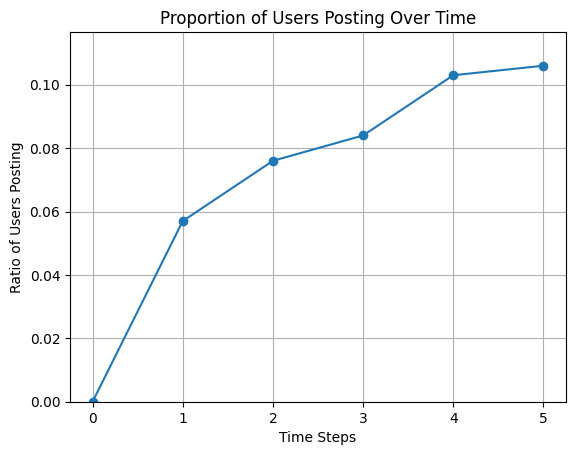

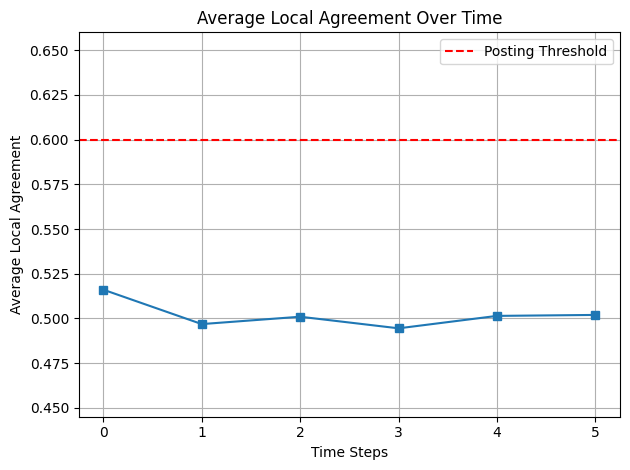

EXPERIMENT STATS:
Total posts: 663
Positive posts: 424 (0.64)
Negative posts: 114 (0.17)
Overall pos/neg ratio: 3.72
Overall proportion of positive posts: 0.79
Variance in proportion of positive posts over time: 0.0001

Final opinion range: 0.0004
Final opinion variance: 0.0000
Final opinion std dev: 0.0001
Final average local agreement: 0.5019
Final local agreement variance: 0.0066
Second largest eigenvalue: 0.2087


In [83]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.08                     # probability between communities
)

model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5, 
    visualize=True
)